In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.mixture import GaussianMixture
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering

In [5]:
data = pd.read_csv("marketing_campaign.csv", sep = "\t")

In [6]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [20]:
data.columns
data = data.dropna()

In [21]:
data["Total_Spend"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data['MntGoldProds']

C:\Users\srini\AppData\Local\Temp\ipykernel_68704\4227894171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Total_Spend"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data['MntGoldProds']


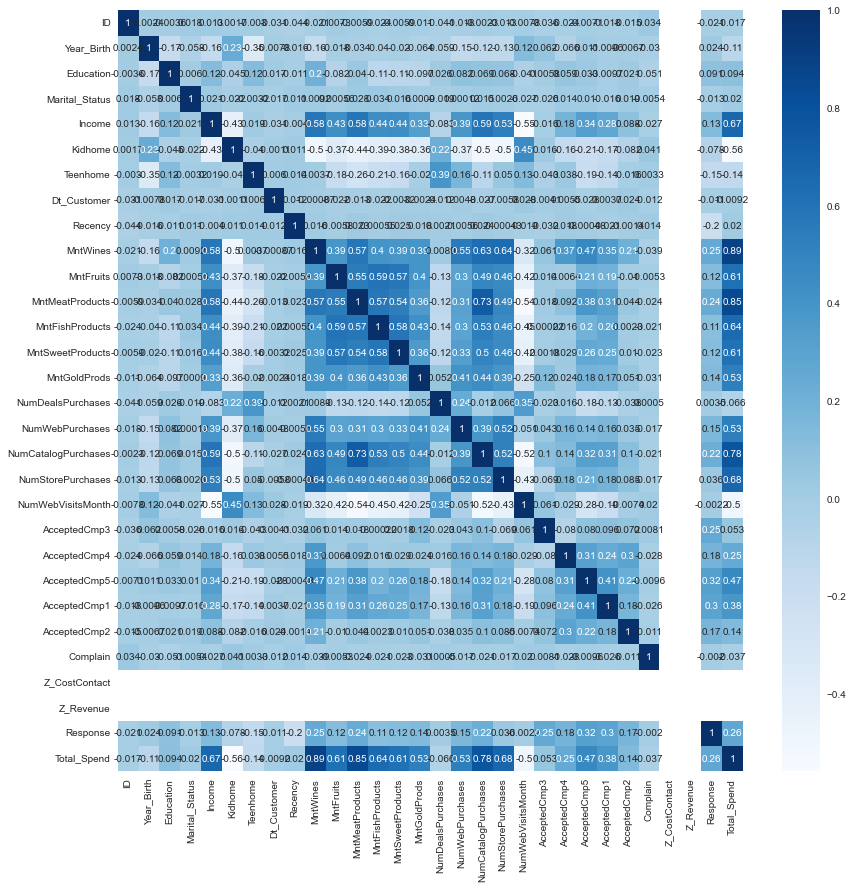

In [22]:
corr = data.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, cmap='Blues');

In [23]:
le = LabelEncoder()
cat_cols = [col for col in data.columns if data[col].dtypes == "O"]
for i in cat_cols:
    data[i] = le.fit_transform(data[[i]])

In [24]:
df = data.copy()
# Omitting accepted campaigns
col_del = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']
df = df.drop(col_del, axis=1)
# Scaling
scaler = StandardScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df), columns=df.columns)
print("Scaled")

Scaled


In [25]:
scaled_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Total_Spend
0,-0.019809,-0.986443,-0.350527,0.254218,0.234063,-0.823039,-0.928972,-1.306327,0.310532,0.978226,...,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,0.0,0.0,1.675488
1,-1.051009,-1.236801,-0.350527,0.254218,-0.234559,1.039938,0.909066,-0.901056,-0.380509,-0.872024,...,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,0.0,0.0,-0.962358
2,-0.445526,-0.318822,-0.350527,1.182303,0.769478,-0.823039,-0.928972,0.609497,-0.795134,0.358511,...,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,0.0,0.0,0.280250
3,0.182737,1.266777,-0.350527,1.182303,-1.017239,1.039938,-0.928972,-0.680000,-0.795134,-0.872024,...,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,0.0,0.0,-0.919224
4,-0.081373,1.016420,1.429011,-0.673866,0.240221,1.039938,-0.928972,0.325281,1.554407,-0.391671,...,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,0.0,0.0,-0.307044


In [26]:
pca = PCA(n_components=3)
pca.fit(scaled_df)
pca_df = pd.DataFrame(pca.transform(scaled_df), columns=["columns1", "columns2", "columns3"])

In [27]:
pca_df.describe().T

,count,mean,std,min,25%,50%,75%,max
columns1,2216.0,-3.206420e-18,2.641535,-5.099274,-2.450146,-0.657630,2.306239,7.140297
columns2,2216.0,3.847704e-17,1.420519,-3.092684,-1.132533,-0.145765,1.021286,4.872888
columns3,2216.0,9.619261e-18,1.164384,-4.443759,-0.782845,0.001191,0.700290,5.428119


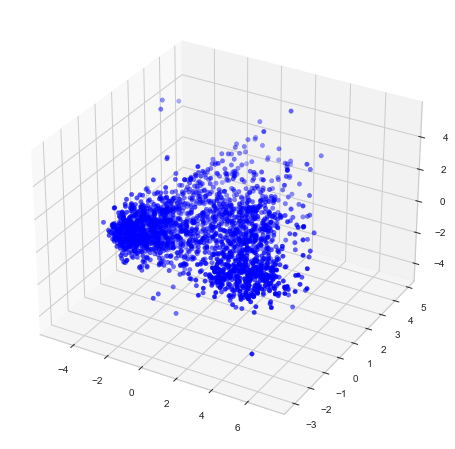

In [28]:
x = pca_df["columns1"]
y = pca_df["columns2"]
z = pca_df["columns3"]

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, c="blue", marker="o")
plt.show()

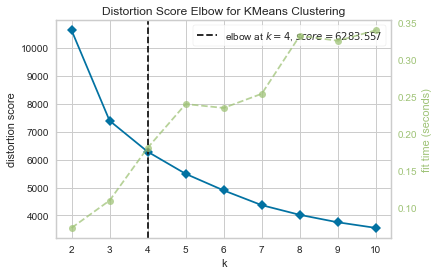

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
elbow_method = KElbowVisualizer(KMeans(), k=10)
elbow_method.fit(pca_df)
elbow_method.show()

In [30]:
gmm = GaussianMixture(n_components=4, covariance_type='spherical', max_iter=2000, random_state=42).fit(pca_df)
labels = gmm.predict(pca_df)

In [31]:
pca_df['Clusters'] = labels

In [32]:
data['Clusters'] = labels

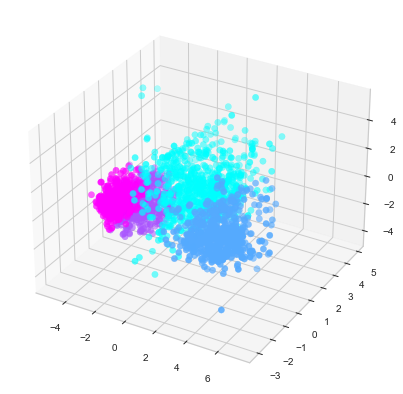

In [33]:
fig = plt.figure(figsize=(12,7))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=pca_df['Clusters'], marker="o", cmap="cool")
plt.show()

<AxesSubplot:xlabel='Clusters', ylabel='count'>

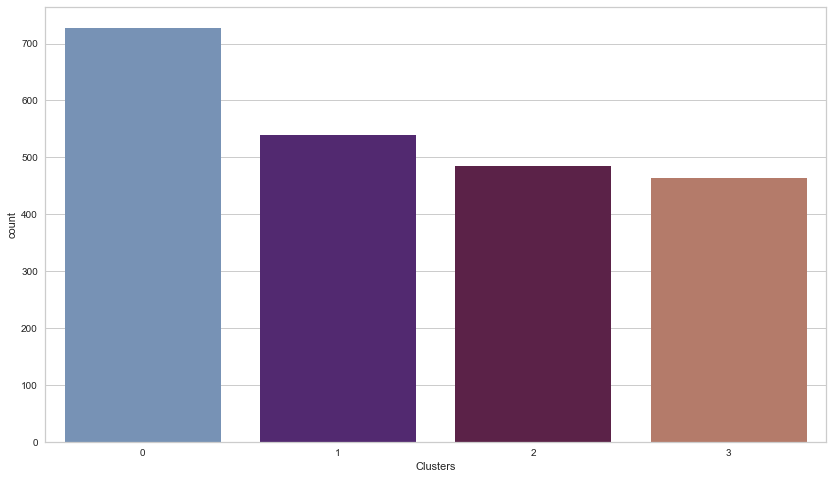

In [34]:
plt.figure(figsize=(14,8))
sns.countplot(x=data['Clusters'], palette='twilight')

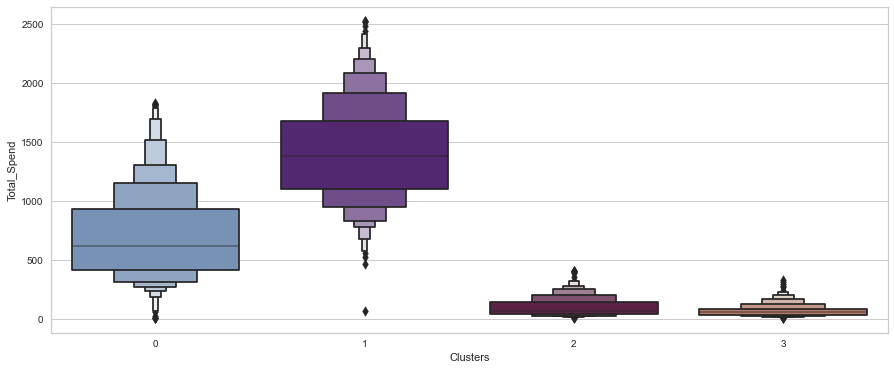

In [35]:
plt.figure(figsize=(15,6))
sns.boxenplot(x="Clusters", y="Total_Spend", palette='twilight', data=data);

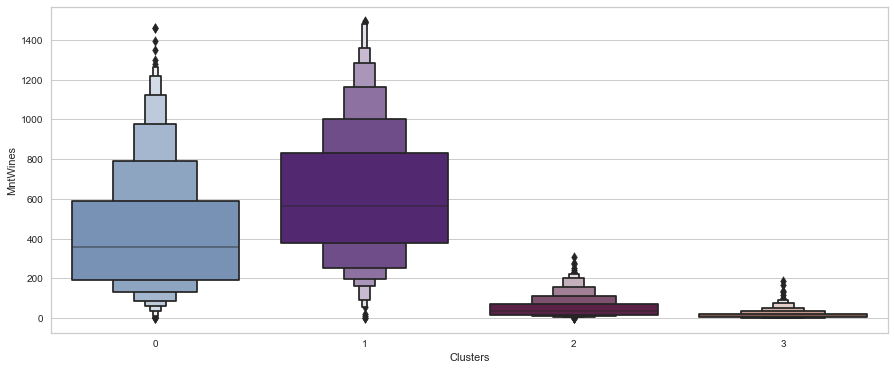

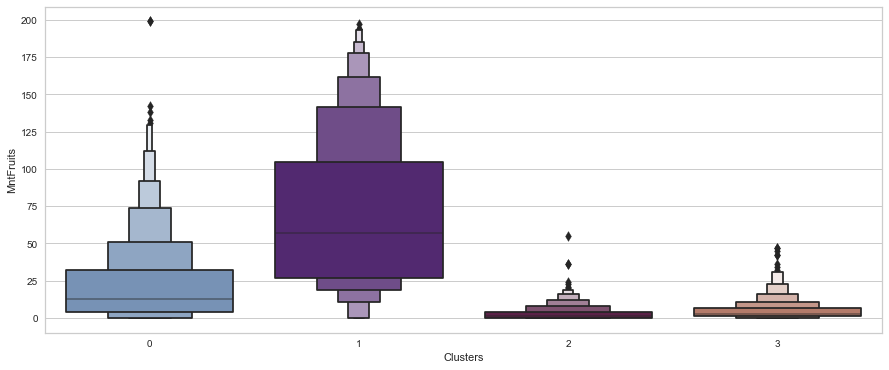

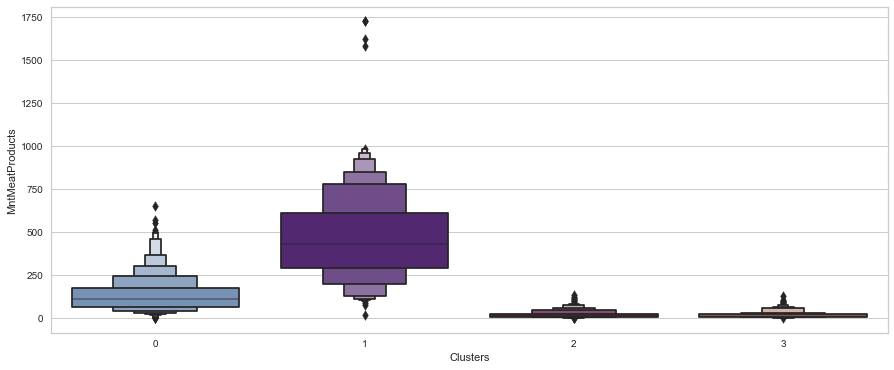

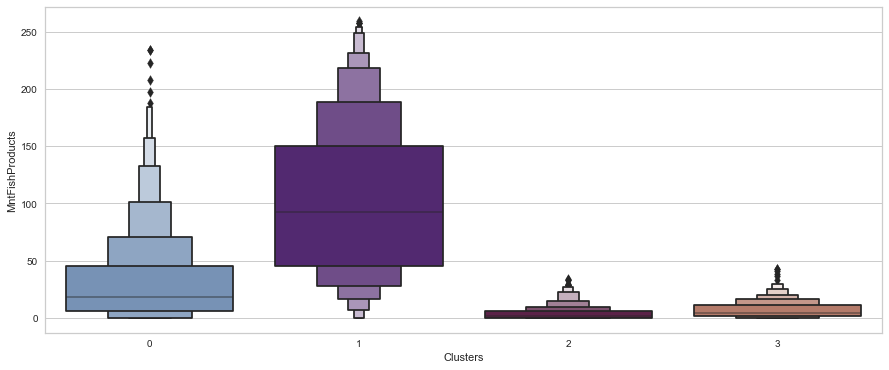

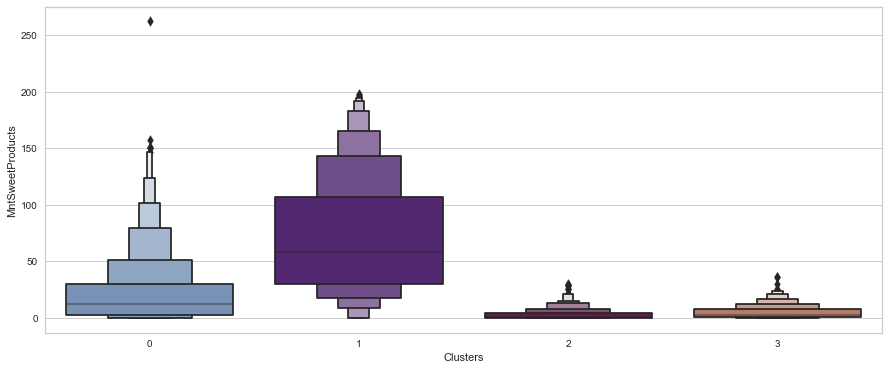

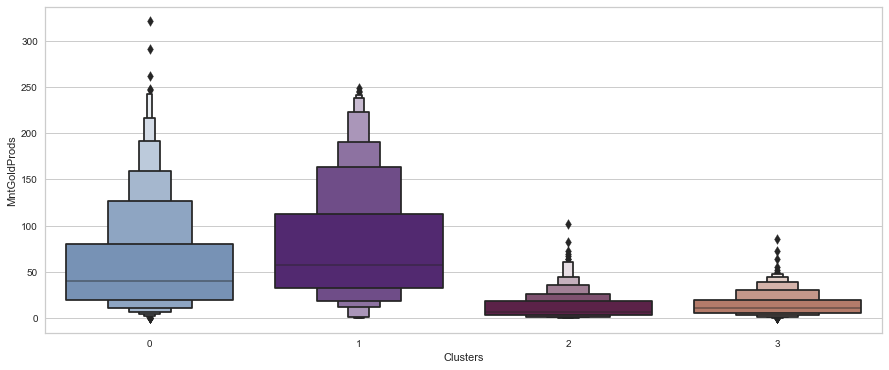

In [36]:
prod = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
for i in prod:
    plt.figure(figsize=(15,6))
    sns.boxenplot(x="Clusters", y=i, palette='twilight' ,data=data);

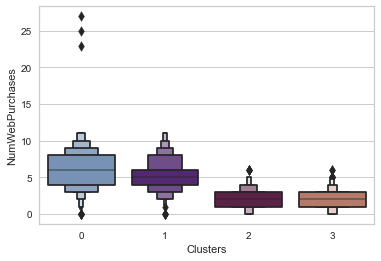

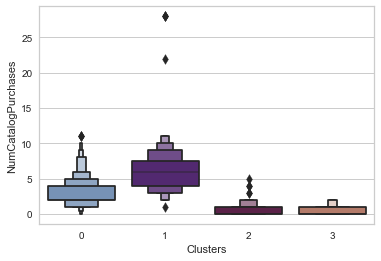

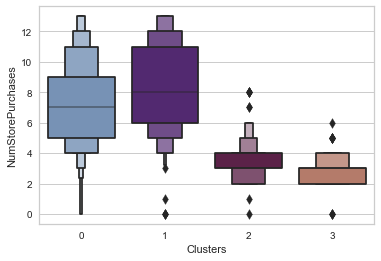

In [37]:
place = ["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]
for i in place:
    sns.boxenplot(x="Clusters", y=i, palette='twilight',data=data);
    plt.show()

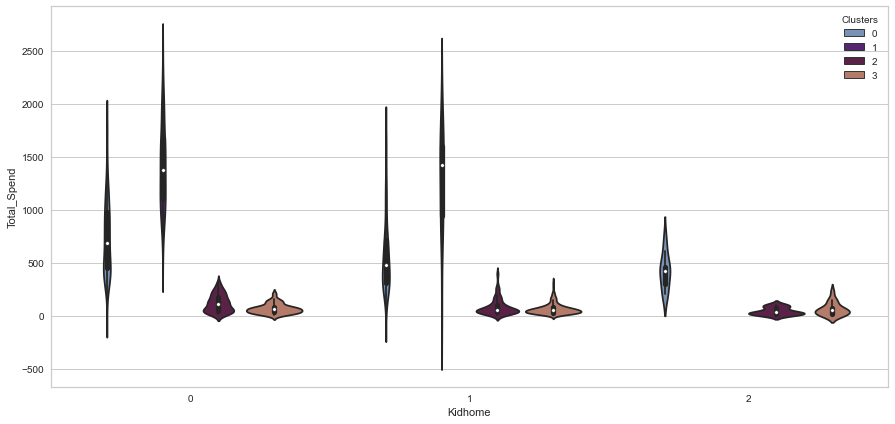

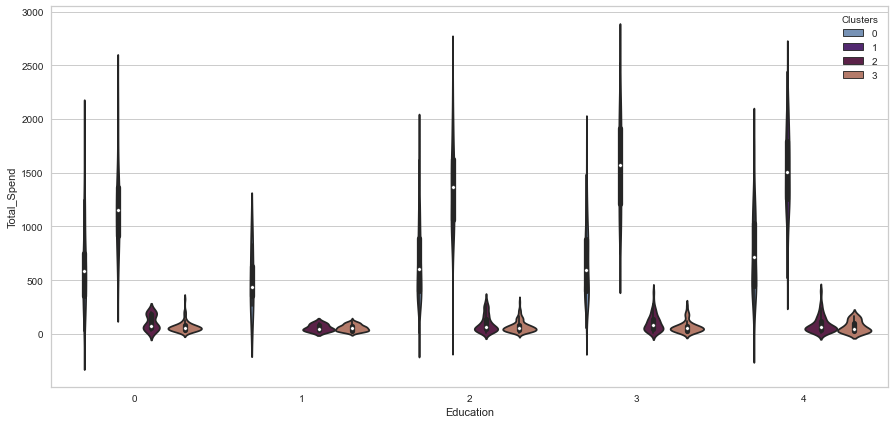

In [38]:
prf = ["Kidhome", "Education"]
for i in prf:
    plt.figure(figsize=(15,7))
    sns.violinplot(x=i, y="Total_Spend", hue="Clusters", palette='twilight' ,data=data)
    plt.show()